### Random array , 取中位數

In [1]:
import random
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

raw=[]
raw = np.random.normal(30, 1, 50) ## 平均30，標準差3，100個

# raw=np.concatenate([raw,np.array([100,100,100])])
# for i in range(0,9):
#     raw.append(random.randint(1,999))

#     raw.append(round(((random.randint(1,999))//10^2)*8.728/9.34*7.324, 2))
print("數列    ： " + str(raw))
print("中位數 ： " + str(np.median(raw)))

數列    ： [30.52901762 30.65775678 29.09741071 29.59674283 30.45478306 28.52677021
 30.60682829 28.71927818 29.17088496 31.0926162  29.86390004 29.83696188
 30.52340708 31.08179978 29.50162122 30.44878421 30.35790956 29.3422478
 29.56046726 32.13509848 29.54468808 30.95557176 28.98660572 29.73964586
 30.55491193 29.56510604 29.12107396 30.17129835 30.51472777 30.93725016
 30.28216167 29.39463394 31.0462504  29.34401251 30.05408504 29.86243352
 29.26023728 30.34045105 30.23218    30.04178739 30.48629901 29.49688011
 29.5726534  29.42025073 30.37172562 31.56330648 29.81555998 32.08308243
 28.18170053 29.62591989]
中位數 ： 29.952843716721198


In [3]:
np.random.exponential?

/usr/local/Cellar/python3/3.6.1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/usr/local/Cellar/python3/3.6.1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


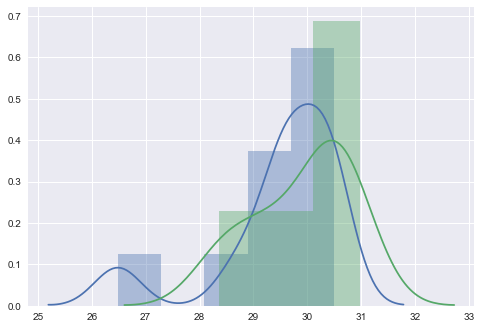

In [106]:
data = np.random.normal(30, 1, 10)
sns.distplot(data)

data = np.random.normal(30, 1, 10)
sns.distplot(data)
plt.show()

/usr/local/Cellar/python3/3.6.1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


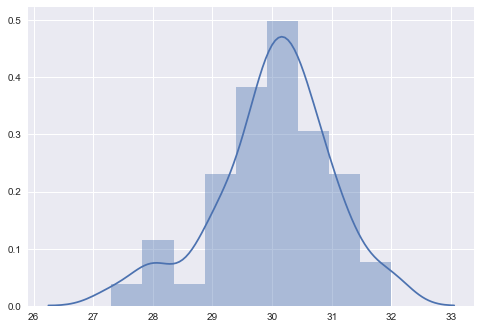

In [102]:
import seaborn as sns
sns.distplot(raw)
plt.show()

/usr/local/Cellar/python3/3.6.1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


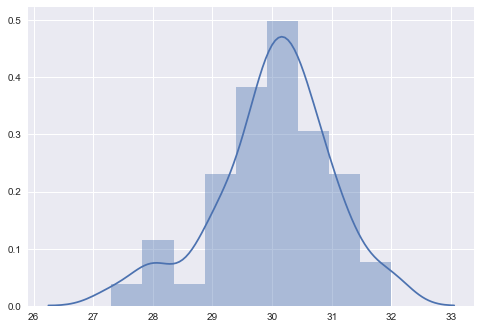

In [107]:
import seaborn as sns
sns.distplot(raw)
plt.show()

raw :  [30.23046507 30.48136358 30.73029969 31.98643867 28.04387615 29.75462404
 29.6442838  31.10395659 30.28797897 30.4028459  30.95852657 29.8631761
 30.14859916 28.63985073 29.42996781 29.91917464 30.30799542 29.36130505
 28.05715345 28.92005559 31.99697316 30.2023747  29.8104718  31.16605689
 27.86178016 29.11524388 27.30338269 30.61573455 30.21161621 29.75219671
 28.96787917 29.86374253 30.87180481 31.00978103 29.61230993 29.97818789
 29.08735645 31.39693554 30.22257367 30.0985636  30.40462312 29.30071212
 30.17041238 31.45704159 30.55306184 30.70347151 30.54917142 30.69791025
 29.87637104 29.90656411]
annie_hp_filter :  [30.51, 30.47, 30.39, 30.27, 30.09, 30.05, 30.12, 30.24, 30.31, 30.31, 30.23, 30.06, 29.86, 29.68, 29.59, 29.56, 29.54, 29.52, 29.58, 29.76, 29.95, 29.99, 29.87, 29.66, 29.38, 29.21, 29.2, 29.37, 29.54, 29.69, 29.83, 30.0, 30.14, 30.2, 30.17, 30.14, 30.15, 30.2, 30.21, 30.21, 30.23, 30.28, 30.41, 30.55, 30.61, 30.61, 30.53, 30.39, 30.2, 30.0]

 df_annie : 
      

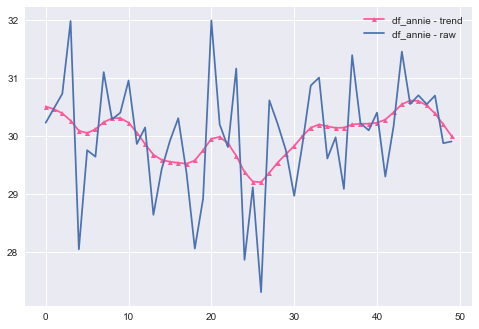

In [109]:
from scipy import sparse, stats
def hp_filter(x, lamb=5000):
    w = len(x)
    b = [[1]*w, [-2]*w, [1]*w]
    D = sparse.spdiags(b, [0, 1, 2], w-2, w)
    I = sparse.eye(w)
    B = (I + lamb*(D.transpose()*D))
    return sparse.linalg.dsolve.spsolve(B, x)
print("raw : ", raw)

annie_hp_filter=hp_filter(raw, lamb=10)
print("annie_hp_filter : ", list(np.round(annie_hp_filter, 2)))
df_annie=pd.DataFrame({"trend":annie_hp_filter, "raw": raw})
print("\n df_annie : ")
print(df_annie)

plt.plot(df_annie["trend"],markersize=5, marker='^', color='#fa5a9a', label="df_annie - trend")
plt.plot(df_annie["raw"], label='df_annie - raw')
plt.legend()
plt.show()

### Random to new a dataframe, from dict to dataframe

In [113]:
import random
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import matplotlib.pyplot as plt
resid, trend = sm.tsa.filters.hpfilter(raw, lamb=10)
df=pd.DataFrame({"raw":raw, "trend": trend, "resid": resid}) 
# df

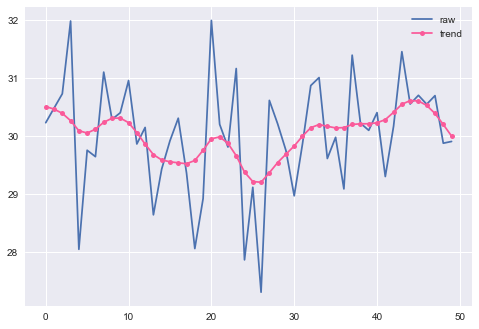

In [114]:
plt.plot(raw, label='raw')
plt.plot(trend,markersize=5, marker='o', color='#fa5a9a', label="trend")
# plt.plot(resid,markersize=5, marker='x', color='#778899', label="resid-殘差")
plt.legend()
plt.show()

### 算殘差，rawdata 與 求出來的平滑曲線模型之間的差異
1. 算殘差 ： raw data - 平滑曲線 ， 計算 rawdata 跟模型的差異
2. 轉成 series
3. 剔除 na

*** But, 

In [56]:
###### new a empty dataframe
ds=pd.DataFrame()

In [59]:
resid = raw-trend  ###### [ida 0926] resid = residual 殘差。 resid = raw data - 平滑曲線 ， 計算 rawdata 跟模型的距離差異
print("resid = ", resid, "\n")
ds = pd.Series(resid) ##### [ida 0926]  轉成 series
ds = ds.dropna()      ##### [ida 0926] 剔除 na
print("ds = ")
print(ds, "\n")

resid =  [  53.41883936 -119.34232919   87.05882353  -11.5307228  -113.38163558
  135.2968634   -38.94117647   68.86456736  -61.4432296 ] 

ds = 
0     53.418839
1   -119.342329
2     87.058824
3    -11.530723
4   -113.381636
5    135.296863
6    -38.941176
7     68.864567
8    -61.443230
dtype: float64 



### 標準化，算殘差與中位數之間的距離
### ====================================================

In [60]:
md = np.median(trend) ###### [ida 0926] (rawdata) x 取中位數
print("md   = " , md)

data = ds-md                ###### [ida 0926] 標準化： 殘差 - 中位數

print("data = ")
print(data, "\n")

md   =  563.530722802157
data = 
0   -510.111883
1   -682.873052
2   -476.471899
3   -575.061446
4   -676.912358
5   -428.233859
6   -602.471899
7   -494.666155
8   -624.973952
dtype: float64 



## 算 mad 
### 每一個資料點減去平均值，再取絕對值，再加總，再算平均 
### sum( | x-x 的平均 | ) / n
### ＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝

## 算 mad test : 
### process data, using median filter
### 讓 data 服從「指數分配」, 讓它的分佈像指數分配的樣子 ，就可以找出界線，超出則屬於異常點。

＝＝＝＝＝＝＝＝＝＝＝＝


In [481]:
#####  [ida 0926] 把 data 轉換成指數分配
ares = (data-data.median()).abs()   ### .abs() 取絕對值，讓它 >0 
data_sigma = data.mad() + 1e-12 ### 算 mad
### data.mad() 平均絕對誤差
###  + 1e-12 : 讓分母不要等於 0 ，加上一個很小的數
ares = ares/data_sigma ### ares ：  『服從指數分配』 的數據。 

In [473]:
ares

0    1.039209
1    2.291763
2    1.708130
3    0.000000
4    0.618109
5    0.825502
6    1.018076
7    1.104057
8    0.350928
dtype: float64

### 再對 ares 設門檻值



In [474]:
alpha=0.2
# compute significance
##### [ida 0926] 設門檻值
p = 1. - alpha #### p = 80% 信賴區間，（1-alpha) 
R = stats.expon.interval(p, loc=ares.mean(), scale=ares.std())  #### 指數分配的分布。找出 80%的值
print(R) #### 會列出左右的門檻值 各 10% (合起來就是 20%)，我們只取右邊的 R[1] ，在 X 軸的位置 。若有數據超過  R[1]  就會被標為異常 


threshold = R[1]


(1.067511063515016, 2.577884914361128)


In [469]:
r_id = ares.index[ares>threshold] ##### 把 ares 中，超過 index 的值列出來。
defect = np.array(list(map(lambda x: int(x>threshold), ares)))  ##### 超過為1 ，未超過為0 ，算出 defect 的值